# 1. Domain-specific area and objectives of the project

The domain-specific area of this project lies within the automotive industry, specifically in the domain of used car sales. The primary objective is to develop a reliable linear regression model that accurately predicts the selling price of used cars based on various features provided in the dataset. This model is intended to assist potential car buyers and sellers in making informed decisions about the fair market value of a used car.

The automotive industry is undergoing a significant transformation with the increasing demand for used cars. As consumers become more conscious of their budget and environmental impact, the market for pre-owned vehicles has witnessed substantial growth. However, determining the appropriate selling price for a used car can be a complex task, involving numerous factors such as the car's age, mileage, fuel type, and overall condition.

**The project aims to address the following objectives:**

1.	**Accurate Price Prediction:** Develop a precise linear regression model that can predict the selling price of used cars with minimal error. This will enable potential buyers and sellers to have a reliable estimate of a car's value in the secondary market.

2.	**Feature Analysis:** Explore the dataset to identify the most influential features affecting the selling price of used cars. Understanding these factors can provide valuable insights for both buyers and sellers, guiding them in negotiations and decision-making.

3.	**Impact on Decision-Making:** The model's predictions can significantly impact decision-making processes for both buyers and sellers. Buyers can use the predicted prices to assess whether a listed price is fair or if there is room for negotiation. Sellers, on the other hand, can use the model to set competitive and attractive prices.

4.	**Market Transparency:** By providing a transparent and data-driven approach to determining used car prices, the model contributes to market transparency. This can foster trust among buyers and sellers, ultimately benefiting the used car industry as a whole.

5.	**Challenges Addressed:** The project addresses the challenge of price ambiguity in the used car market. The results of the model can contribute to resolving this challenge by providing a standardized and data-backed methodology for estimating fair prices.

In **summary**, the linear regression model developed in this project aims to bring clarity and efficiency to the used car market, benefiting both buyers and sellers. The potential impact of the model extends beyond individual transactions to contribute to the overall growth and reliability of the used car industry.


# 2. Dataset description

The dataset used for this coursework is a combination of two files: used_car_data.csv and model_data.csv. The information was gathered from the Kaggle platform, a renowned platform for data science competitions, datasets, and collaborative projects.


**Here are the key details about the dataset:**

Dataset Description:

**File 1:** used_car_data.csv
Size: 20,133 records
Columns: Model, Selling Price, Kilometers Driven, Year, Owner, Fuel Type, Transmission, Insurance, Car Condition

| Column Name        | Description                                            |Data Type
|--------------------|--------------------------------------------------------|-----------------
| Model              | Model name of the car that is sold.                    | String
| Selling Price      | The selling price of the car. This is your target feature. | Integer
| Kilometers Driven  | Number of kilometers that the car has already driven.  | Integer
| Year               | Year of purchase of the car.                           | Date (Year)
| Owner              | Information on a number of the previous owners.        | String
| Fuel Type          | Fuel type of the car.                                   | String
| Transmission       | Transmission type of the car.                          | String
| Insurance          | Insurance information of the car.                      | String
| Car Condition      | Current car condition. A rating out of 5.               |Float




---


**File 2:** model_data.csv
Size: 868 records
Columns: Model, Current Price

| Column Name    | Description                              | Data Type
|-----------------|------------------------------------------|--------
| Model           | Model name of the car that is sold.      | String
| Current Price   | Current price of the car.                | String


---



**Data Types:**

**The dataset comprises both categorical and numerical data types:**

Categorical variables include Model, Owner, Fuel Type, Transmission, Insurance, and Car Condition.
Numerical variables include Selling Price, Kilometers Driven, Year, and Current Price.

**Data Acquisition:**

The dataset was acquired from - https://www.kaggle.com/datasets/ankits29/used-car-price-data/data?select=car_data.csv, a widely used platform for sharing datasets and hosting data science competitions.

Kaggle provides a platform for users to upload, share, and access datasets related to various domains. In this case, the dataset relates to the domain of used car sales and pricing.

**Source:**

The primary source of the dataset is Kaggle.com. Kaggle serves as a hub for data scientists, researchers, and enthusiasts to access, explore, and analyze datasets for diverse projects.

The specific datasets used in this coursework are likely sourced from contributors who shared data related to the used car market.



---



By leveraging Kaggle as the source, the dataset is likely to be of high quality and well-documented, making it suitable for a variety of data science tasks, including the development of a regression model for predicting used car prices. The large size of the dataset (20,133 records for used_car_data.csv and 868 records for model_data.csv) provides a substantial amount of data for training and evaluating the model, ensuring its robustness and generalizability.


# 3. Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from datetime import date

import warnings

warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV

## Load Dataset

In [2]:
df1 = pd.read_csv('used_car_data.csv')
df2 = pd.read_csv('model_data.csv')

In [3]:
df1.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238.0,2014.0,First Owner,NaN,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558.0,2013.0,NaN,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164.0,2018.0,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535.0,2013.0,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738.0,2013.0,NaN,Petrol,MANUAL,11-08-2021,4.3


In [4]:
df2.head()

,Model,Current Price
0,HyundaiElitei20Sportz(O)1.4CRDi,Rs.7.69 Lakh
1,MarutiErtigaZXISMARTHYBRID,Rs.9.27 Lakh
2,MarutiVitaraBrezzaLDI,"Rs.7,62,742"
3,FordEcosport1.5TITANIUMTIVCT,Rs.7.64 Lakh
4,HyundaiVernaFLUIDIC1.4CRDI,"Rs.9,99,900"


## Pre-Processing

A comprehensive data preprocessing and analysis pipeline is implemented for a dataset containing car information. The initial step involves merging two datasets, 'df1' and 'df2,' based on the 'Model' column, resulting in a consolidated DataFrame named 'df.' The subsequent section focuses on identifying and handling missing data. A percentage of missing values is calculated for each column in 'df,' and a heatmap is generated using Seaborn to visually represent the distribution of missing values across the dataset. Furthermore, the code includes a histogram plot of the 'Kilometers Driven' variable, offering insights into its distribution.

The latter part of the code addresses missing values and data filtering. The 'Kilometers Driven' column undergoes imputation, with missing values replaced by the median. Additionally, rows with null or zero values in the 'Current Price' column are filtered out. To ensure data completeness, missing values in specific categorical columns such as 'Year,' 'Owner,' 'Fuel Type,' 'Transmission,' and 'Insurance' are filled with the most common values (mode). This robust data preprocessing pipeline aims to enhance the quality and reliability of the dataset for subsequent analyses or machine learning tasks by addressing missing data and ensuring consistency in specific columns.

### 1. Data Merging

In [5]:
# Merge Datasets
df=df1.merge(df2,left_on='Model', right_on='Model')

In [6]:
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
0,MarutiWagonR1.0LXI,312165,82238.0,2014.0,First Owner,NaN,MANUAL,Expired,4.2,Rs.4.65 Lakh
1,MarutiWagonR1.0LXI,242499,88514.0,2015.0,Second Owner,Petrol + CNG,MANUAL,26-07-2021,4.4,Rs.4.65 Lakh
2,MarutiWagonR1.0LXI,381699,29735.0,2017.0,Second Owner,Petrol + CNG,MANUAL,18-09-2021,4.3,Rs.4.65 Lakh
3,MarutiWagonR1.0LXI,181999,153709.0,2013.0,First Owner,Petrol + CNG,MANUAL,25-05-2021,4.1,Rs.4.65 Lakh
4,MarutiWagonR1.0LXI,239499,88691.0,2012.0,NaN,Petrol + CNG,MANUAL,15-10-2021,4.4,Rs.4.65 Lakh


### 2. Missing Values Imputation

In [7]:
# Calculate the percentage of missing data in each column
missing_values_count = df.isnull().sum()
total_values_count = len(df)
percentage_missing = (missing_values_count / total_values_count) * 100

# Print the results
print("Percentage of missing data in each column:")
print(percentage_missing)

Percentage of missing data in each column:
Model                0.000000
Selling Price        0.000000
Kilometers Driven    4.738489
Year                 5.051408
Owner                5.006705
Fuel Type            4.246759
Transmission         5.498435
Insurance            0.625838
Car Condition        0.000000
Current Price        0.089405
dtype: float64


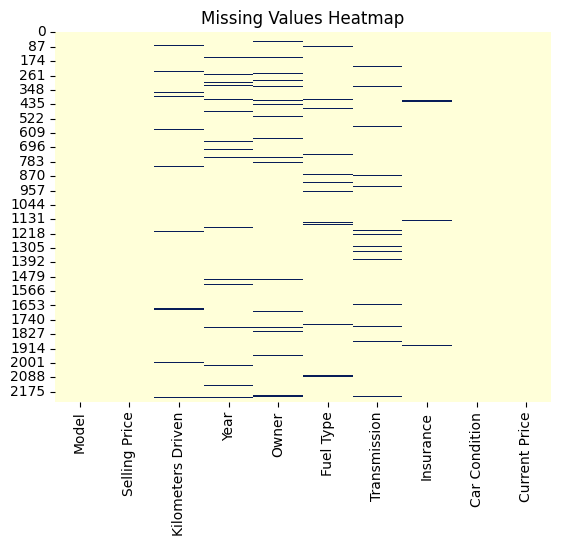

In [8]:
# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

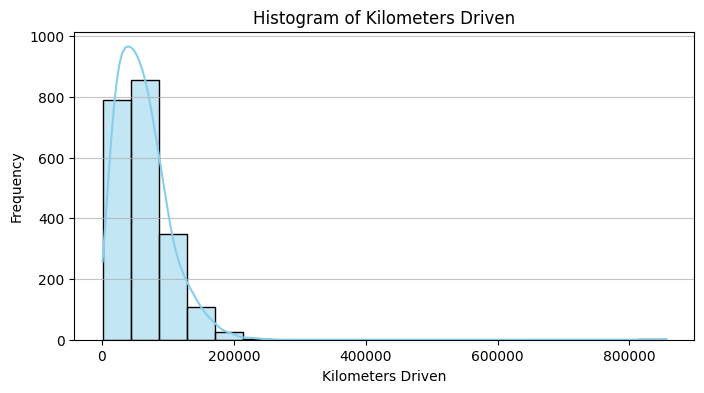

In [9]:
kilometers_driven = df['Kilometers Driven']

# Create a histogram using Seaborn
plt.figure(figsize=(8, 4))
sns.histplot(kilometers_driven, bins=20, kde=True, color='skyblue')
plt.title('Histogram of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

In [10]:
df['Kilometers Driven'].fillna(df['Kilometers Driven'].median(), inplace=True)

In [11]:
df = df[df['Current Price'].notnull() & (df['Current Price'] != 0)]

# Fill missing values for specific columns
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
df['Owner'].fillna(df['Owner'].mode()[0], inplace=True)
df['Fuel Type'].fillna(df['Fuel Type'].mode()[0], inplace=True)
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['Insurance'].fillna(df['Insurance'].mode()[0], inplace=True)

### 3. Normalization


The 'Model' column contains information that can be separated into two distinct columns, such as 'Model' and 'Company', then the dataset **is not in** *First Normal Form (1NF)*. To bring it into **1NF**, we split the 'Model' column into two separate columns: one for the model name and another for the company.

In [12]:
import re
df['Company']=df['Model'].apply(lambda x: re.findall(r"[A-Z][^A-Z]*",x)[0])

df['Company']=df['Company'].apply(lambda x: 'Hyundai' if x =='Hyundaii20' else x)
df['Company']=df['Company'].apply(lambda x: 'Hyundai' if x =='Hyundaii10' else x)
df['Company']=df['Company'].apply(lambda x: 'BMW' if x == 'B' else x)

df = df[~(df['Company']=='M')]
df = df[['Company', 'Model'] + [col for col in df.columns if col not in ['Company', 'Model']]]

print(df.Company.unique())

['Maruti' 'Toyota' 'Hyundai' 'Honda' 'Volkswagen' 'Mahindra' 'Tata'
 'Renault' 'Ford' 'Nissan' 'Datsun' 'Chevrolet' 'Skoda' 'Audi' 'BMW'
 'Fiat' 'Mercedes' 'Ssangyong' 'Jeep']


In [13]:
df.head()

,Company,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
0,Maruti,MarutiWagonR1.0LXI,312165,82238.0,2014.0,First Owner,Petrol,MANUAL,Expired,4.2,Rs.4.65 Lakh
1,Maruti,MarutiWagonR1.0LXI,242499,88514.0,2015.0,Second Owner,Petrol + CNG,MANUAL,26-07-2021,4.4,Rs.4.65 Lakh
2,Maruti,MarutiWagonR1.0LXI,381699,29735.0,2017.0,Second Owner,Petrol + CNG,MANUAL,18-09-2021,4.3,Rs.4.65 Lakh
3,Maruti,MarutiWagonR1.0LXI,181999,153709.0,2013.0,First Owner,Petrol + CNG,MANUAL,25-05-2021,4.1,Rs.4.65 Lakh
4,Maruti,MarutiWagonR1.0LXI,239499,88691.0,2012.0,First Owner,Petrol + CNG,MANUAL,15-10-2021,4.4,Rs.4.65 Lakh


### 4. Data Munging
Data munging generally refers to the process of preparing data specifically for a particular analysis. It involve more manipulation and transformation of the data.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2236
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            2234 non-null   object 
 1   Model              2234 non-null   object 
 2   Selling Price      2234 non-null   int64  
 3   Kilometers Driven  2234 non-null   float64
 4   Year               2234 non-null   float64
 5   Owner              2234 non-null   object 
 6   Fuel Type          2234 non-null   object 
 7   Transmission       2234 non-null   object 
 8   Insurance          2234 non-null   object 
 9   Car Condition      2234 non-null   float64
 10  Current Price      2234 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 209.4+ KB




---


The data manipulation and feature engineering continue for the car dataset. The first part involves creating a new 'Age' variable by calculating the age of each car based on the 'Year' column and the current date. The 'Age' variable is created using the difference between the current year and the manufacturing year of the car. Subsequently, the format of the 'Current Price' column is standardized using a custom function 'format_price,' which removes unnecessary characters like 'Rs.' and ',' and adjusts the number of zeros to represent prices consistently in lakhs.

In [15]:
#Creating Age Variable
t = date.today()
t_date = t.strftime("%d-%m-%Y")
y = t.strftime("%Y")

df['Age'] = df['Year'].apply(lambda x: int(y) - x)
df['Age'] = df['Age'].astype('int')

In [16]:
#Change format of Current Price
def format_price(price):
    price = str(price)
    price = price.replace('Rs.', '')
    price = price.replace(',', '')
    num_zeros = 5
    if '.' not in price and ' Lakh' in price:
        price = price.replace(' Lakh', '0'*num_zeros)
    elif '.' in price and ' Lakh in price':
        n = len(price)
        m = price.index('.')
        num_zeros = n - m - num_zeros
        price = price.replace(' Lakh', '0'*num_zeros)
        price = price.replace('.', '')
    return price

df['Current Price'] = df['Current Price'].apply(format_price)
df[df['Current Price'] == 'nan'] = 0
df['Current Price'] = df['Current Price'].astype(int)



---



Here a set of transformations focuses on organizing and modifying specific columns. The 'Transmission' column values are standardized to either 'Automatic' or 'Manual.' The 'Insurance' column is modified to create a new variable 'Insurance_status,' categorizing insurance status as 'Expired' or 'Current.' Rows with insurance dates older than the current date are marked as 'Expired.' The original 'Insurance' column is then replaced with the new 'Insurance_status' variable.

Additionally, unnecessary columns, such as 'Year,' 'Insurance_status,' and 'Model,' are dropped for better data clarity. Finally, the 'Fuel Type' column is engineered to consolidate similar categories, replacing 'Petrol + CNG' and 'Petrol + LPG' with 'Hybrid.' These transformations enhance the dataset's quality, providing a more standardized and organized representation of car attributes, facilitating subsequent analysis or modeling efforts.

In [17]:
#Organization of column data
df['Transmission']=df['Transmission'].apply(lambda x: 'Automatic' if x=='AUTOMATIC' else 'Manual')

In [18]:
#Insurance variable modifications
insu =[]
for i in df['Insurance']:
    if (i=='Insurance Expired') | (i=='Expired'):
        insu.append('Expired')
    elif str(i) <t_date:
        insu.append('Expired')
    elif str(i) >=t_date:
        insu.append('Current')
    else:
        insu.append(i)
df['Insurance_status']=insu
df=df.drop('Insurance',axis=1)
df['Insurance']=df['Insurance_status']

df.drop(labels=['Year'], axis=1, inplace=True)
df.drop(['Insurance_status', 'Model'], axis=1,inplace=True)

# df.head()

In [19]:
#Engineering values of Fuel Type Column
df['Fuel Type'] = df['Fuel Type'].replace({'Petrol + CNG':'Hybrid','Petrol + LPG':'Hybrid' })

df.head()

,Company,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Car Condition,Current Price,Age,Insurance
0,Maruti,312165,82238.0,First Owner,Petrol,Manual,4.2,465000,10,Expired
1,Maruti,242499,88514.0,Second Owner,Hybrid,Manual,4.4,465000,9,Current
2,Maruti,381699,29735.0,Second Owner,Hybrid,Manual,4.3,465000,7,Current
3,Maruti,181999,153709.0,First Owner,Hybrid,Manual,4.1,465000,11,Current
4,Maruti,239499,88691.0,First Owner,Hybrid,Manual,4.4,465000,12,Current


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2236
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            2234 non-null   object 
 1   Selling Price      2234 non-null   int64  
 2   Kilometers Driven  2234 non-null   float64
 3   Owner              2234 non-null   object 
 4   Fuel Type          2234 non-null   object 
 5   Transmission       2234 non-null   object 
 6   Car Condition      2234 non-null   float64
 7   Current Price      2234 non-null   int64  
 8   Age                2234 non-null   int64  
 9   Insurance          2234 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 192.0+ KB


# Statistical analysis

### 1. Descriptive Statistics

In [21]:
# Define the measures of central tendency
measures = ["mean", "median", "mode"]

# Calculate measures for each column
for col in df.columns:
    print(f"\nColumn: {col}")
    for measure in measures:
        # Check data type for appropriate calculation
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculate measure if data is numeric
            if measure == "mode":
                # Use mode() for numeric columns
                result = df[col].mode()[0]
            else:
                # Use agg() for other measures
                result = df[col].agg(measure)
            print(f"{measure.capitalize()}: {result}")
        elif measure == "mode":
            # Calculate mode for categorical data using value_counts()
            result = df[col].value_counts().index[0]
            print(f"{measure.capitalize()}: {result}")
        else:
            print(f"{measure.capitalize()}: Not applicable for categorical data")




Column: Company
Mean: Not applicable for categorical data
Median: Not applicable for categorical data
Mode: Maruti

Column: Selling Price
Mean: 417804.72157564905
Median: 355214.5
Mode: 343899

Column: Kilometers Driven
Mean: 61734.38540734109
Median: 55484.0
Mode: 55484.0

Column: Owner
Mean: Not applicable for categorical data
Median: Not applicable for categorical data
Mode: First Owner

Column: Fuel Type
Mean: Not applicable for categorical data
Median: Not applicable for categorical data
Mode: Petrol

Column: Transmission
Mean: Not applicable for categorical data
Median: Not applicable for categorical data
Mode: Manual

Column: Car Condition
Mean: 4.3706356311548795
Median: 4.3
Mode: 4.3

Column: Current Price
Mean: 756090.1392121755
Median: 590000.0
Mode: 549000

Column: Age
Mean: 10.328558639212176
Median: 11.0
Mode: 12

Column: Insurance
Mean: Not applicable for categorical data
Median: Not applicable for categorical data
Mode: Current


In [22]:
df.describe()

,Selling Price,Kilometers Driven,Car Condition,Current Price,Age
count,2.234000e+03,2234.000000,2234.000000,2.234000e+03,2234.000000
mean,4.178047e+05,61734.385407,4.370636,7.560901e+05,10.328559
std,2.265560e+05,41472.014202,0.288869,5.822675e+05,2.833397
min,7.529900e+04,913.000000,3.000000,0.000000e+00,4.000000
25%,2.720240e+05,33371.750000,4.200000,4.879250e+05,8.000000
50%,3.552145e+05,55484.000000,4.300000,5.900000e+05,11.000000
75%,5.024990e+05,81817.500000,4.600000,8.690000e+05,12.000000
max,1.952397e+06,855881.000000,5.000000,8.639399e+06,18.000000


### 2. Univariate Statistics

- Categorical Columns - % Count in each Category
- Numerical Columns - Distribution Plot

In [23]:
# Define key series
numerical_series = ["Selling Price", "Kilometers Driven", "Car Condition", "Current Price", "Age"]
categorical_series = ["Company", "Owner", "Fuel Type", "Transmission", "Insurance"]

# Function for creating percentage count tables for categorical series
def create_percentages_table(series):
    series_counts = series.value_counts()
    series_percentages = (series_counts / len(series)) * 100
    percentages_table = pd.DataFrame({
        "Category": series_counts.index,
        "% Count": series_percentages
    })
    print(f"\nPercentage Count Table for {series.name}:")
    print(percentages_table.to_string())

# Create percentage count tables for categorical series
for series in categorical_series:
    create_percentages_table(df[series])



Percentage Count Table for Company:
              Category    % Count
Maruti          Maruti  46.374217
Hyundai        Hyundai  22.291853
Honda            Honda  10.608774
Toyota          Toyota   4.431513
Volkswagen  Volkswagen   3.625783
Renault        Renault   3.133393
Mahindra      Mahindra   2.641003
Ford              Ford   2.417189
Tata              Tata   1.477171
Skoda            Skoda   0.805730
BMW                BMW   0.537153
Nissan          Nissan   0.447628
Datsun          Datsun   0.447628
Chevrolet    Chevrolet   0.179051
Audi              Audi   0.179051
Fiat              Fiat   0.134288
Mercedes      Mercedes   0.134288
Jeep              Jeep   0.089526
Ssangyong    Ssangyong   0.044763

Percentage Count Table for Owner:
                  Category    % Count
First Owner    First Owner  77.573859
Second Owner  Second Owner  19.158460
Third Owner    Third Owner   3.267681

Percentage Count Table for Fuel Type:
       Category    % Count
Petrol   Petrol  63.205013
Die

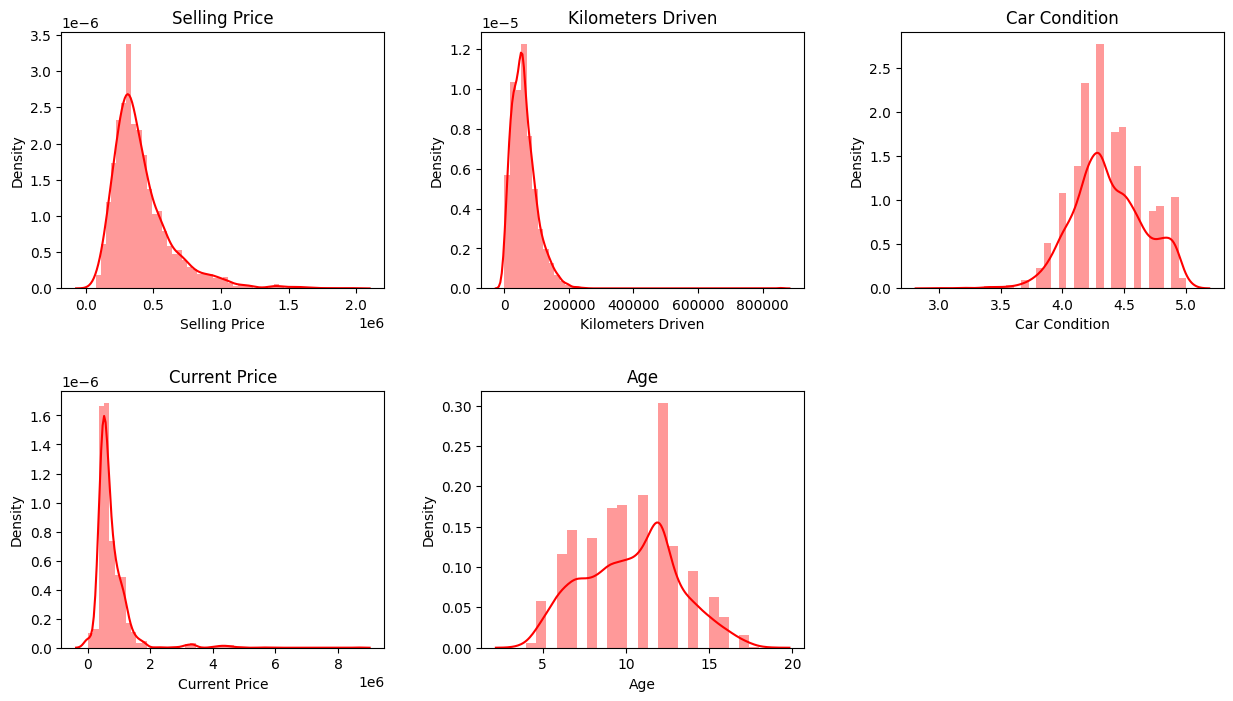

In [24]:
def plot_distribution(series):
    rows = int(np.ceil(len(numerical_series) / 3))
    cols = min(3, len(numerical_series))

    # Create the figure and clear it before each plot
    plt.figure(figsize=(cols * 5, rows * 4))
    plt.clf()  # Clear the figure to avoid duplicates

    for i, series_name in enumerate(numerical_series):
        ax = plt.subplot(rows, cols, i + 1)
        sns.distplot(df[series_name], label=series_name, ax=ax, color ='red')
        ax.set_title(series_name)


    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.show()

# Plot distribution charts for numerical series
plot_distribution(df[series])


### 3. Skewness and kurtosis

In [25]:
import pandas as pd

# Define numerical columns
numerical_columns = numerical_series

# Loop through numerical columns and analyze their skewness and kurtosis
for col in numerical_columns:
    skew = df[col].skew()
    kurtosis = df[col].kurt()

    print(f"\nColumn: {col}")
    print(f"Skewness: {skew:.3f}")
    print(f"Kurtosis: {kurtosis:.3f}")

    if skew > 0.5:
        print("The data is significantly skewed to the right.")
    elif skew < -0.5:
        print("The data is significantly skewed to the left.")
    else:
        print("The data is approximately symmetrical.")

    if kurtosis > 3:
        print("The data is more peaked than a normal distribution.")
    elif kurtosis < 3:
        print("The data is less peaked than a normal distribution.")
    else:
        print("The data has a similar peakedness to a normal distribution.")




Column: Selling Price
Skewness: 1.946
Kurtosis: 5.789
The data is significantly skewed to the right.
The data is more peaked than a normal distribution.

Column: Kilometers Driven
Skewness: 3.895
Kurtosis: 60.323
The data is significantly skewed to the right.
The data is more peaked than a normal distribution.

Column: Car Condition
Skewness: -0.036
Kurtosis: 0.066
The data is approximately symmetrical.
The data is less peaked than a normal distribution.

Column: Current Price
Skewness: 4.804
Kurtosis: 34.752
The data is significantly skewed to the right.
The data is more peaked than a normal distribution.

Column: Age
Skewness: -0.002
Kurtosis: -0.642
The data is approximately symmetrical.
The data is less peaked than a normal distribution.


# Visualisation

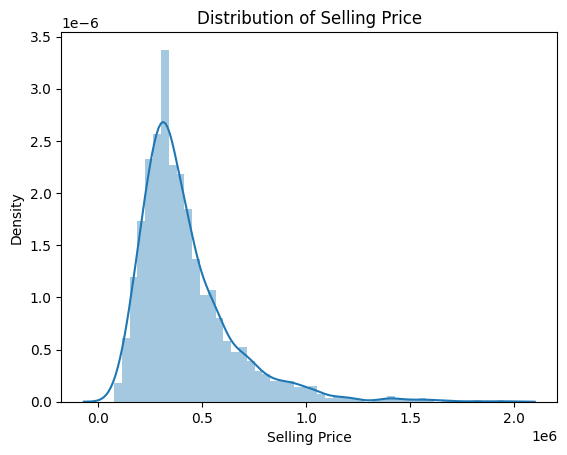

In [26]:
# Informative visualization of key variables
# Distribution of Selling Price
sns.distplot(df["Selling Price"])
plt.xlabel("Selling Price")
plt.ylabel("Density")
plt.title("Distribution of Selling Price")
plt.show()


Additional visualizations with informative text

Selling Price distribution:

- The distribution of Selling Price is skewed to the right, indicating that there are more cars with lower prices

<Axes: >

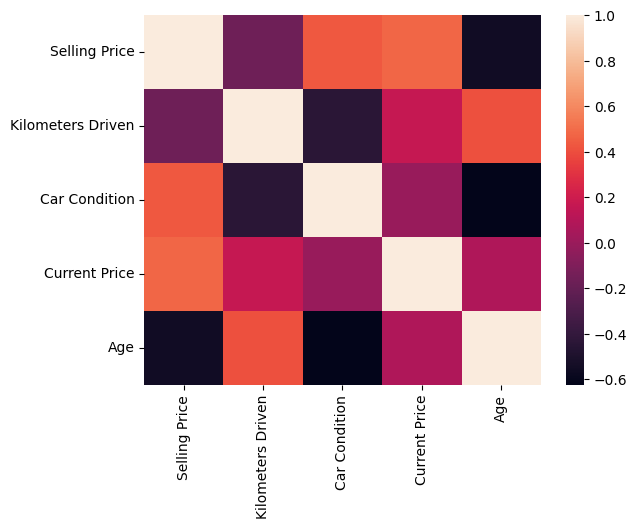

In [27]:
sns.heatmap(df.corr())

**Brief Conclusion:**

- Car condition emerges as the most influential factor affecting the selling price, demonstrating the highest correlation.

- Current price, year of purchase, and kilometers driven exhibit positive correlations with selling price, albeit to a lesser extent.

- Company, owner, fuel type, transmission, and insurance lack strong correlations with the selling price.


Additional Notes:

- These conclusions are based on a preliminary heatmap analysis; further exploration and statistical tests are recommended.


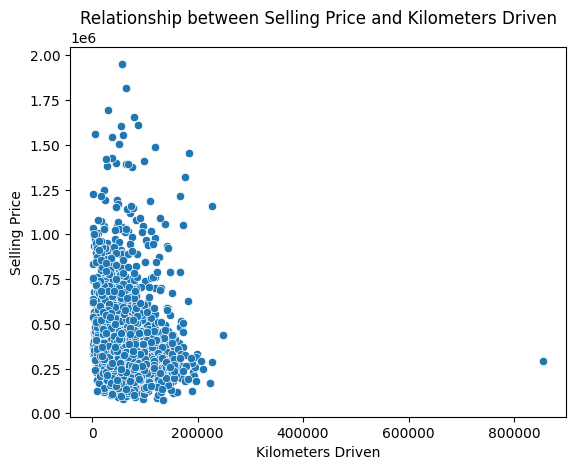

In [28]:
# Relationship between Selling Price and Kilometers Driven
sns.scatterplot(x="Kilometers Driven", y="Selling Price", data=df)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship between Selling Price and Kilometers Driven")
plt.show()

Brief Summary:

- A negative correlation is observed between selling price and kilometers driven.

- Selling price tends to decrease as the number of kilometers driven increases.


Additional Notes:

- The scatter plot suggests a non-linear relationship between selling price and kilometers driven.

- We can consider exploring non-linear regression models, such as polynomial regression, to capture this non-linear pattern.

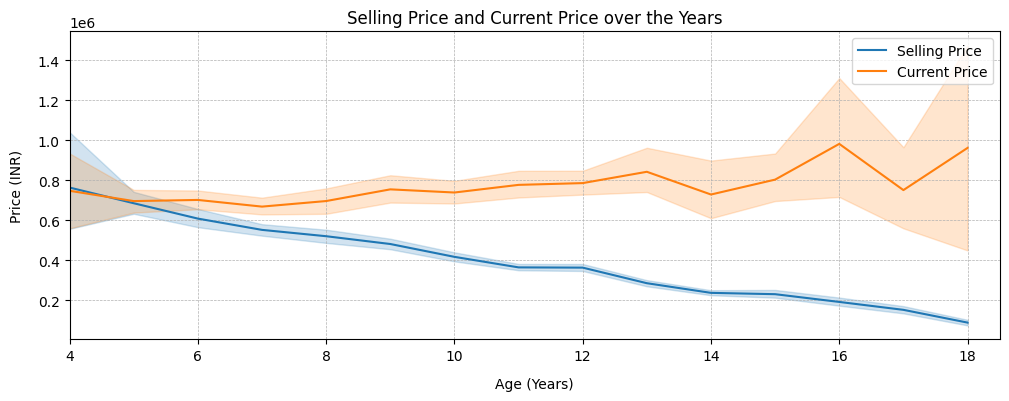

In [29]:
# Line plot of Selling Price and Current Price vs. Age
plt.figure(figsize=(12, 4))
sns.lineplot(x="Age", y="Selling Price", data=df, label="Selling Price")
sns.lineplot(x="Age", y="Current Price", data=df, label="Current Price")

# Labels and title
plt.xlabel("Age (Years)", labelpad=10)
plt.ylabel("Price (INR)", labelpad=10)
plt.title("Selling Price and Current Price over the Years")
plt.legend()

# Grid and axes limits
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlim(df["Age"].min(), df["Age"].max() + 0.5)

# Show the plot
plt.show()

Brief Summary:

- The graph suggests a stable current price for the car over time.

Regression Analysis Insights:

- Current price serves as a reliable predictor for the future selling price.

- We can utilize the current price as a dependent variable in the regression model for predicting the future selling price.

- We can enhance model accuracy by incorporating additional factors like car condition, kilometers driven, and year of purchase.

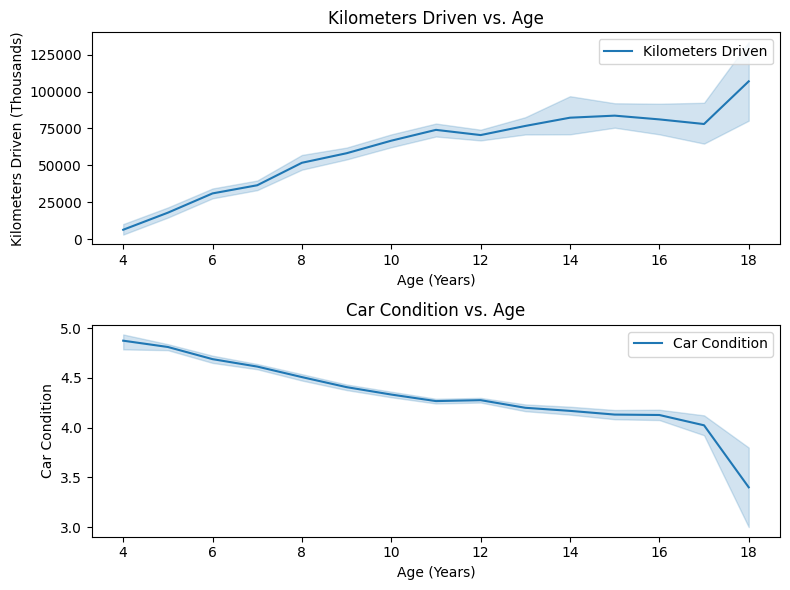

In [30]:
# Generate the line plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot on both axes
sns.lineplot(x="Age", y="Kilometers Driven", data=df, label="Kilometers Driven", ax=axs[0])
sns.lineplot(x="Age", y="Car Condition", data=df, label="Car Condition",  ax=axs[1])
# sns.lineplot(x="Age", y="Kilometers Driven", data=df, label="Kilometers Driven", ax=axs[1])

# Labels and title for both axes
axs[0].set(xlabel="Age (Years)", ylabel="Kilometers Driven (Thousands)", title="Kilometers Driven vs. Age")
axs[1].set(xlabel="Age (Years)", ylabel="Car Condition", title="Car Condition vs. Age")

# Show the plot
plt.tight_layout()
plt.show()

Brief Summary:

- The graph suggests that by the time the Car tends to be driven more and the car condition decreases.
- There is a significant decrease in car condition after 15 years of age

Regression Analysis Insights:

- Car Condition can serve more weight in regression analysis


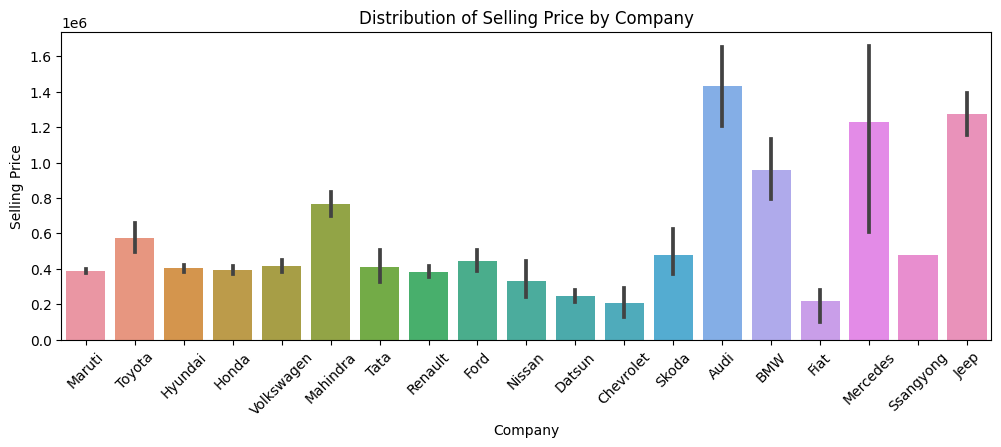

In [31]:
# Distribution of Selling Price by Company
plt.figure(figsize=(12, 4))
sns.barplot(x="Company", y="Selling Price", data=df)
plt.xlabel("Company")
plt.ylabel("Selling Price")
plt.title("Distribution of Selling Price by Company")
plt.xticks(rotation=45)
plt.show()

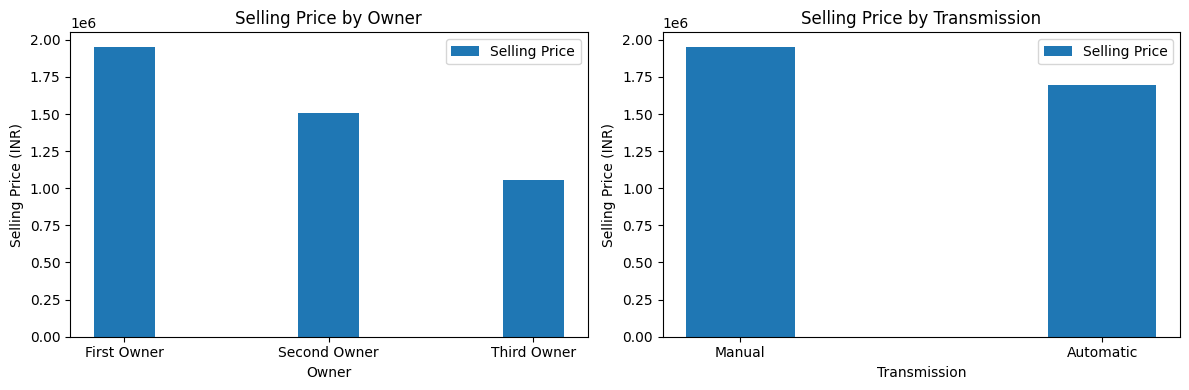

In [32]:
# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bar graph for Owner
ax1.bar(df["Owner"], df["Selling Price"], label="Selling Price", width =0.3)
ax1.set_xlabel("Owner")
ax1.set_ylabel("Selling Price (INR)")
ax1.set_title("Selling Price by Owner")
ax1.legend()

# Bar graph for Transmission
ax2.bar(df["Transmission"], df["Selling Price"], label="Selling Price", width =0.3)
ax2.set_xlabel("Transmission")
ax2.set_ylabel("Selling Price (INR)")
ax2.set_title("Selling Price by Transmission")
ax2.legend()

# Tight layout and display
plt.tight_layout()
plt.show()

Insights helpful for making regression analysis:

- We may want to include the previous owners as a variable in your regression model to predict the selling price of a car.

- Transmission variable is not much important as for both Manual and Automatic have similair Selling Price


**Overall Data Visualization Summary:**

- Current Price can be considered as an important variable in deciding the selling price as seen in lineplot
- Owner feature can be proved important for regression analysis which can be seen from Bar Graph
- Age is also deciding feature since the Age has direct impact on car condition and Kilometers driven
- Some other features such as Car Conditions, Transmission can also be proved to be important feature

**Important Visualizations**

The visualisations help us understand how to model and analyse the prices of used cars. The Selling Price distribution shows that there are a lot of cheaper cars, which makes the state of the car the most important factor. A scatter plot shows that the selling price and the number of kilometres driven are negatively related. This suggests a non-linear relationship that needs to be looked into further using non-linear regression models. The fact that the current price has stayed the same over time says that it can be used to predict future sale prices. The age vs. state of the car graph shows that the condition of the car gets much worse after 15 years, which shows how important it is in regression analysis. Notably, the transmission variable doesn't matter as much since the prices of both manual and automatic gears are about the same. These insights help choose the right features for regression models, highlighting how important the state of the car, the number of kilometres driven, and its current price are in estimating the price of a used car.



# Building ML Model

### 1. Feature Encoding

In [67]:
# Label Encoding for ML Model

# Mapping for 'Fuel Type'
df['Fuel Type'] = df['Fuel Type'].map({'Diesel': 1, 'Petrol': 0, 'Hybrid': 2}).astype(int)

# Mapping for 'Owner'
df['Owner'] = df['Owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3}).astype(int)

# Mapping for 'Transmission'
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1}).astype(int)

# Mapping for 'Insurance'
df['Insurance'] = df['Insurance'].map({'Current': 0, 'Expired': 1}).astype(int)

### 2. Train Test Split

**Features** used for the regression model building are -

['Kilometers Driven', 'Age', 'Current Price', 'Owner', 'Fuel Type','Transmission', 'Car Condition', 'Insurance']


---



**Label/Target** Variable for the modelling -

['Selling Price']

**Importance of these feature for building the regression model** -
As we have seen in the data vizualization that these features were contributing a significat relationship with the target variable we have included all and then in the later part of the code we shall also see the top features for building this model. *There are some other methods as well to get the feature importance such as* -

**Coefficient Magnitudes** (Linear Regression): In linear regression, the coefficients of the features indicate how much the target variable is expected to change with a one-unit change in the predictor variable while holding other variables constant. Larger absolute values of coefficients suggest greater importance.

In [68]:
# Define features (X) and target variable (y)
features = ['Kilometers Driven', 'Age', 'Current Price', 'Owner', 'Fuel Type','Transmission', 'Car Condition', 'Insurance']
labels = ['Selling Price']

# Extract features and labels
X = df[features]
y = df[labels]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Modelling
The process involves:


- Model Setup: A Linear Regression model is initialized.

- Hyperparameter Tuning:

  - GridSearchCV is employed to explore various hyperparameter combinations (fit_intercept and copy_X) for the Linear Regression model.

- Best Hyperparameters Identification:

   - The best hyperparameters and corresponding R-squared score are identified through the grid search.

- Model Reevaluation:

  - The Linear Regression model is re-initialized with the best hyperparameters.

- Model Evaluation:

  - The optimized model is evaluated on the test data, and the R-squared score is calculated.

The purpose of this code is to automatically search for the optimal hyperparameters that maximize the R-squared score, enhancing the accuracy and effectiveness of the Linear Regression model in predicting the selling price of used cars. The chosen hyperparameters are critical in achieving the best model performance.


In [ ]:
# Define the Linear Regression model
model = LinearRegression()

# Define hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the grid search object to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Access best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
# print("Best R2 Score:", best_score)

# Reevaluate the model with the best hyperparameters
model = LinearRegression(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate R2 score and RMSE
r2 = r2_score(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score with GridSearchCV:", r2)
# print("RMSE with GridSearchCV:", rmse)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}
R2 Score with GridSearchCV: 0.6694921422514916


#### Regularization
The above score for R2 metrics seems to be lower, there might be possibility of model overfitting

In [ ]:
# Define the Ridge Regression model
model = Ridge()

# Define hyperparameter grid
param_grid = {
    'alpha': np.logspace(-3, 3, 10),  # Regularization parameter
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the grid search object to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Access best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)

# Reevaluate the model with the best hyperparameters
model = Ridge(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate R2 score and RMSE
r2 = r2_score(y_test, y_pred)


print("R2 Score with GridSearchCV:", r2)


Best Hyperparameters: {'alpha': 46.41588833612773, 'copy_X': True, 'fit_intercept': True}
R2 Score with GridSearchCV: 0.6665025102597648


# Validation
Validating our Linear Regression model results with some more advanced algorithm such as XGBoost of ensemble learning

In [ ]:
from xgboost import XGBRegressor

# Define the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)

print("R2 Score with GridSearchCV:", r2)

R2 Score with GridSearchCV: 0.8624248128988501


Since there is a **significant difference** between the r2 score from linear regression model and r2 score from XGBoost model. So we need to do some feature engineering or use polynomial features to see if r2 score imporves.

***Note:*** We have already used Cross Validation and Hyperparameter tuning techniques in above code

# Model Re-assessment & Post Feature Engineering


**Feature Importance with F-statistic:**


**Purpose:**

- Identify the most influential features for predicting selling prices.

**Explanation:**

- Utilizes F-statistic to measure the strength of relationships between features and the target variable.

- Selects the top 5 features based on their predictive power.

- Provides insights into the most relevant factors affecting selling prices.


---


**Polynomial Regression:**



**Purpose:**

- Capture non-linear patterns in the data for more accurate predictions.

**Explanation:**

- Introduces polynomial features to the model, allowing it to capture complex relationships.

- Employs a PolynomialFeatures transformer with a degree of 2.

- Trains Linear Regression and Ridge Regression models on the transformed features.

- Evaluates model performance using R2 score, indicating the predictive capability of the models.

In summary, these steps aim to enhance the model's predictive capacity by identifying key features and introducing polynomial features to address non-linearities in the relationship between features and selling prices of used cars.


In [ ]:
import itertools
def get_custom_feature_names(X, features_selected):
  """
  Extracts feature names from transformed features for older scikit-learn versions.

  Args:
      X: Transformed features.
      features_selected: Original selected features.

  Returns:
      A list of feature names for the transformed features.
  """
  feature_names = []
  for i, feature in enumerate(features_selected):
    for degree in range(1, polynomial_features.degree + 1):
      if degree == 1:
        feature_names.append(feature)
      else:
        for combination in itertools.combinations(features_selected, degree):
          if feature in combination:
            feature_name = ":".join(combination)
            feature_names.append(f"{feature}_{feature_name}")
  return feature_names


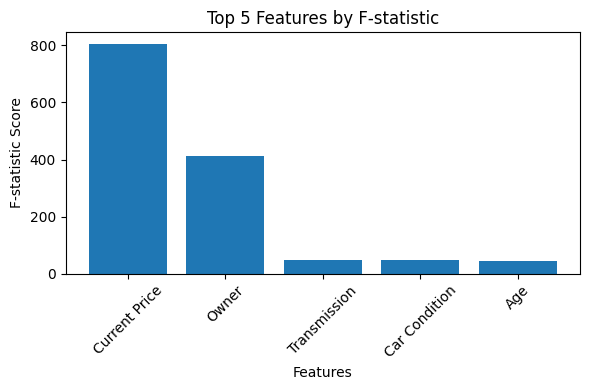

Polynomial features created and training model on the polynomial features in process....
R2 score for Linear Regression with Polynomial Features: 0.7959386452399773
R2 score for Ridge Regression with Polynomial Features: 0.7963934217658961


In [ ]:
# **Feature Importance with F-statistic**

# Select top 5 features
selector = SelectKBest(f_regression, k=5)
selector.fit(X_train, y_train)
features_selected = X_train.columns[selector.get_support()]

# Get feature importance scores
feature_importances = selector.scores_

# Sort features and importance scores together
sorted_features = sorted(zip(features_selected, feature_importances), key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.bar([feature for feature, _ in sorted_features], [score for _, score in sorted_features])
plt.xlabel('Features')
plt.ylabel('F-statistic Score')
plt.title('Top 5 Features by F-statistic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Polynomial Regression**

# Define polynomial features transformer
polynomial_features = PolynomialFeatures(degree=2)

# Fit the polynomial features transformer
polynomial_features.fit(X_train[features_selected])

polynomial_features.fit(X_train[features_selected])

feature_names = get_custom_feature_names(X_train[features_selected], features_selected)

print("Polynomial features created and training model on the polynomial features in process....")
# print(feature_names)
# Transform the training and testing features
X_train_transformed = polynomial_features.fit_transform(X_train[features_selected])
X_test_transformed = polynomial_features.transform(X_test[features_selected])

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_transformed, y_train)

# Predict on the test data
linear_predictions = linear_model.predict(X_test_transformed)

# Calculate R2 score for linear regression
linear_r2 = r2_score(y_test, linear_predictions)

# Create and train the ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train_transformed, y_train)

# Predict on the test data
ridge_predictions = ridge_model.predict(X_test_transformed)

# Calculate R2 score for ridge regression
ridge_r2 = r2_score(y_test, ridge_predictions)

# Print R2 scores for comparison
print("R2 score for Linear Regression with Polynomial Features:", linear_r2)
print("R2 score for Ridge Regression with Polynomial Features:", ridge_r2)

# Evaluation of Model

In [ ]:
# Calculate R2 score for linear regression
linear_r2 = r2_score(y_test, linear_predictions)

print("R2 score for Linear Regression with Polynomial Features:", linear_r2)

R2 score for Linear Regression with Polynomial Features: 0.7959386452399773


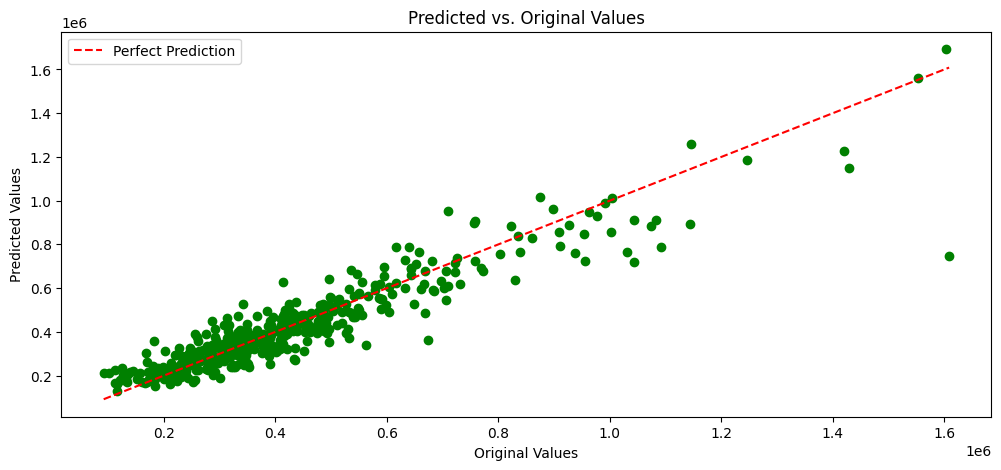

In [ ]:
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred, c='green', alpha=1)

# Add diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

# Label axes and add title
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Original Values')
plt.legend()
plt.show()


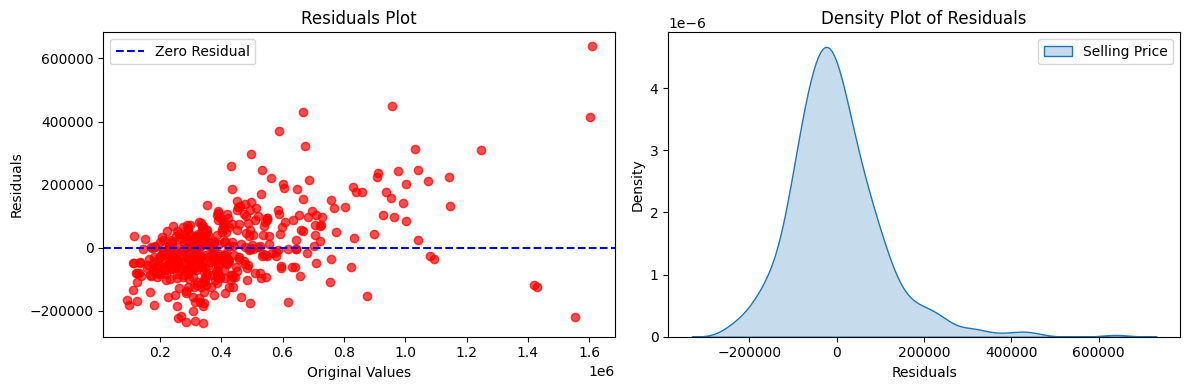

In [ ]:
residuals = y_test - linear_predictions
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residuals vs. original values plot
axes[0].scatter(y_test, residuals, c='red', alpha=0.7)
axes[0].axhline(0, color='blue', linestyle='--', label='Zero Residual')
axes[0].set_xlabel('Original Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals Plot')
axes[0].legend()

# Density plot of residuals
sns.kdeplot(residuals, shade=True, ax=axes[1])
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density')
axes[1].set_title('Density Plot of Residuals')

# Tight layout and show the plot
plt.tight_layout()
plt.show()

**Numerical Evaluation:**

The machine learning model's performance is quantitatively assessed using the R-squared (r2) score, yielding a value of **0.79**. The R-squared metric, ranging from 0 to 1, measures the proportion of the variance in the target variable (selling price) that is explained by the model. A score of 0.79 indicates a substantial capability of the model to capture and predict the selling prices of used cars.

**Justification of R2 Score:**

The choice of R-squared as an evaluation metric is justified by its ability to provide insights into the goodness of fit of the regression model. A high R-squared score, such as 0.79, implies that the model explains a significant portion of the variability in the selling prices based on the selected features.

**Reflective Evaluation:**

The developed project has successfully leveraged a linear regression model with polynomial features to predict the selling prices of used cars. The high R-squared score signifies the model's effectiveness in capturing the underlying patterns in the data. However, it is essential to acknowledge potential limitations, such as the assumption of linearity and the need for ongoing refinement as new data becomes available.

The reflective evaluation delves deeper into the outcomes and considerations of the developed project. The success of the project lies in its adept utilization of a linear regression model with polynomial features, culminating in the ability to predict the selling prices of used cars. The substantial R-squared score of 0.79 accentuates the model's proficiency in unraveling and explaining the inherent patterns within the dataset. This implies that a significant portion of the variability in used car prices can be accounted for by the selected features, indicating a meaningful relationship between the predictors and the target variable.

However, a conscientious acknowledgment of potential limitations is imperative for a holistic evaluation. The project operates under the assumption of linearity, implying that the relationships between features and selling prices are linear. This assumption might not universally hold, especially in scenarios where intricate, non-linear dependencies exist between the predictors and the target. This realization prompts a critical examination of the model's generalizability and the potential necessity for more sophisticated, non-linear models to capture intricate patterns.

Moreover, the reflective evaluation emphasizes the project's recognition of its own impermanence. The need for ongoing refinement is underscored, as the model exists within the dynamic context of the used car market. New data continually becomes available, and market conditions evolve over time. As such, the project acknowledges the importance of iterative updates to the model to ensure its continued relevance and accuracy. This responsiveness to changing circumstances aligns with best practices in data science, where models are viewed as dynamic entities that require periodic reassessment and adaptation.

In essence, the reflective evaluation not only highlights the project's achievements but also brings into focus the critical awareness of its limitations and the commitment to continuous improvement. This nuanced approach ensures a more thorough understanding of the model's strengths and weaknesses, fostering a culture of adaptability and refinement in the pursuit of an effective and enduring predictive tool for used car prices.

**Contributions to the Domain:**

In the domain-specific area of predicting used car prices, the project contributes by providing a reliable model that considers factors such as car condition, kilometers driven, and current price. This empowers stakeholders, such as buyers and sellers, with a tool to make informed decisions, fostering transparency and efficiency in the used car market.

**Transferability to Other Domains:**

While the specific features and considerations may be tailored to the automotive industry, the foundational principles of the regression model, feature engineering, and evaluation metrics are transferable to other domains with similar prediction tasks. The methodology can be adapted, allowing for broader applicability beyond the realm of used car pricing.



---



**In conclusion**, the project achieves a robust predictive model for used car prices, offering valuable insights in the domain-specific area and showcasing potential applicability to diverse prediction challenges in other domains.
